In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import datetime
import regex as re
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler



import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("MY2022 Fuel Consumption Ratings.csv")

In [3]:
dataset.tail()


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


In [4]:
dataset.head(946)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


<Axes: >

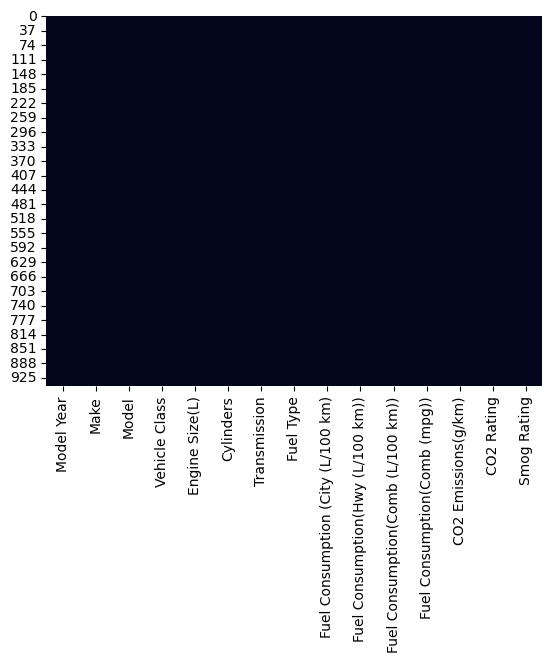

In [5]:
sns.heatmap(dataset.isnull(),cbar=False)

In [6]:
dataset.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [7]:
dataset.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [8]:
X=dataset.drop(['Model Year'], axis = 1)#bağımsız-değişken
y=dataset['Model Year']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [10]:
print(y_train)
print(X_train)

79     2022
687    2022
181    2022
744    2022
215    2022
       ... 
835    2022
192    2022
629    2022
559    2022
684    2022
Name: Model Year, Length: 756, dtype: int64
              Make                          Model           Vehicle Class  \
79             BMW                      Alpina B7               Full-size   
687  Mercedes-Benz             GLE 450 4MATIC SUV           SUV: Standard   
181      Chevrolet                     Camaro ZL1              Subcompact   
744         Nissan                          Versa                 Compact   
215      Chevrolet  Silverado 4WD (No Stop-Start)  Pickup truck: Standard   
..             ...                            ...                     ...   
835            Ram                   1500 Classic  Pickup truck: Standard   
192      Chevrolet                    Equinox AWD              SUV: Small   
629       Maserati            Quattroporte Trofeo               Full-size   
559    Lamborghini              Huracan evo Coupe     

In [11]:
print("Null values :", dataset.isnull().values.sum())
print("NA values :", dataset.isna().values.any())

Null values : 0
NA values : False


In [12]:
#Normalizasyon
dataset.head()


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [13]:
print(dataset.columns)


Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')


In [14]:
dataset.Cylinders.fillna(value = dataset.Cylinders.mean(), inplace=True)

In [15]:
dataset.Cylinders.min()

3

In [16]:
dataset.Cylinders.max()

16

In [17]:
dataset.normalizasyon=(dataset.Cylinders -dataset.Cylinders.min()) / (dataset.Cylinders.max() - dataset.Cylinders.min())

In [18]:
dataset.normalizasyon.head()

0    0.076923
1    0.230769
2    0.076923
3    0.076923
4    0.076923
Name: Cylinders, dtype: float64

In [19]:
#3. Sınıflandırma seçenler:  Çift numaralı öğrenciler ise Lojistik Regresyon modeli ile eğitim verisetinde modeli eğiteceklerdir. 
dataset.head(946)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [25]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot_modelyear = one_hot.fit_transform(dataset['Model Year'].values.reshape(-1,1)).toarray()
one_hot_dataset=pd.DataFrame(one_hot_modelyear, columns=one_hot.categories_)
one_hot_dataset.head(946)


,2022
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
941,1.0
942,1.0
943,1.0
944,1.0


In [26]:
one_hot_dataset2=dataset.join(one_hot_dataset)
one_hot_dataset2.head()


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,"(2022,)"
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3,1.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5,1.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6,1.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6,1.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7,1.0


In [27]:
#date düşürebilir
one_hot_dataset2.drop('Model Year', axis=1, inplace=True)

In [28]:
one_hot_dataset2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,"(2022,)"
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3,1.0
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5,1.0
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6,1.0
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6,1.0
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7,1.0


In [29]:
one_hot2 = OneHotEncoder(handle_unknown='ignore')
one_hot_VehicleClass = one_hot2.fit_transform(dataset['Vehicle Class'].values.reshape(-1,1)).toarray()



In [30]:
one_hot_dataset3=pd.DataFrame(one_hot_VehicleClass, columns=one_hot2.categories_)
one_hot_dataset3.head(946)



,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
one_hot_dataset4=one_hot_dataset2.join(one_hot_dataset3)
one_hot_dataset4.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),...,"(Minivan,)","(Pickup truck: Small,)","(Pickup truck: Standard,)","(SUV: Small,)","(SUV: Standard,)","(Special purpose vehicle,)","(Station wagon: Mid-size,)","(Station wagon: Small,)","(Subcompact,)","(Two-seater,)"
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#date düşürebilir
one_hot_dataset4.drop('Vehicle Class', axis=1, inplace=True)
one_hot_dataset4.head()

,Make,Model,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),...,"(Minivan,)","(Pickup truck: Small,)","(Pickup truck: Standard,)","(SUV: Small,)","(SUV: Standard,)","(Special purpose vehicle,)","(Station wagon: Mid-size,)","(Station wagon: Small,)","(Subcompact,)","(Two-seater,)"
0,Acura,ILX,2.4,4,AM8,Z,9.9,7.0,8.6,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acura,MDX SH-AWD,3.5,6,AS10,Z,12.6,9.4,11.2,25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acura,RDX SH-AWD,2.0,4,AS10,Z,11.0,8.6,9.9,29,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acura,RDX SH-AWD A-SPEC,2.0,4,AS10,Z,11.3,9.1,10.3,27,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acura,TLX SH-AWD,2.0,4,AS10,Z,11.2,8.0,9.8,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
one_hot3 = OneHotEncoder(handle_unknown='ignore')
one_hot_Transmission = one_hot3.fit_transform(dataset['Transmission'].values.reshape(-1,1)).toarray()

In [34]:
one_hot_dataset5=pd.DataFrame(one_hot_Transmission, columns=one_hot3.categories_)
one_hot_dataset5.head(946)

,A10,A6,A7,A8,A9,AM6,AM7,AM8,AS10,AS5,...,AS9,AV,AV1,AV10,AV6,AV7,AV8,M5,M6,M7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
one_hot_dataset6=one_hot_dataset4.join(one_hot_dataset5)
one_hot_dataset6.head()

,Make,Model,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),...,"(AS9,)","(AV,)","(AV1,)","(AV10,)","(AV6,)","(AV7,)","(AV8,)","(M5,)","(M6,)","(M7,)"
0,Acura,ILX,2.4,4,AM8,Z,9.9,7.0,8.6,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acura,MDX SH-AWD,3.5,6,AS10,Z,12.6,9.4,11.2,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acura,RDX SH-AWD,2.0,4,AS10,Z,11.0,8.6,9.9,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acura,RDX SH-AWD A-SPEC,2.0,4,AS10,Z,11.3,9.1,10.3,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acura,TLX SH-AWD,2.0,4,AS10,Z,11.2,8.0,9.8,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Transmission düşürebilir
one_hot_dataset6.drop('Transmission', axis=1, inplace=True)
one_hot_dataset6.head()

,Make,Model,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),...,"(AS9,)","(AV,)","(AV1,)","(AV10,)","(AV6,)","(AV7,)","(AV8,)","(M5,)","(M6,)","(M7,)"
0,Acura,ILX,2.4,4,Z,9.9,7.0,8.6,33,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acura,MDX SH-AWD,3.5,6,Z,12.6,9.4,11.2,25,263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acura,RDX SH-AWD,2.0,4,Z,11.0,8.6,9.9,29,232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acura,RDX SH-AWD A-SPEC,2.0,4,Z,11.3,9.1,10.3,27,242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acura,TLX SH-AWD,2.0,4,Z,11.2,8.0,9.8,29,230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
one_hot4 = OneHotEncoder(handle_unknown='ignore')
one_hot_Make = one_hot4.fit_transform(dataset['Make'].values.reshape(-1,1)).toarray()

In [38]:
one_hot_dataset7=pd.DataFrame(one_hot_Make, columns=one_hot4.categories_)
one_hot_dataset7.head(946)

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Mercedes-Benz,Mitsubishi,Nissan,Porsche,Ram,Rolls-Royce,Subaru,Toyota,Volkswagen,Volvo
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
one_hot_dataset8=one_hot_dataset6.join(one_hot_dataset7)
one_hot_dataset8.head()

,Make,Model,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),...,"(Mercedes-Benz,)","(Mitsubishi,)","(Nissan,)","(Porsche,)","(Ram,)","(Rolls-Royce,)","(Subaru,)","(Toyota,)","(Volkswagen,)","(Volvo,)"
0,Acura,ILX,2.4,4,Z,9.9,7.0,8.6,33,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acura,MDX SH-AWD,3.5,6,Z,12.6,9.4,11.2,25,263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acura,RDX SH-AWD,2.0,4,Z,11.0,8.6,9.9,29,232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acura,RDX SH-AWD A-SPEC,2.0,4,Z,11.3,9.1,10.3,27,242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acura,TLX SH-AWD,2.0,4,Z,11.2,8.0,9.8,29,230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Transmission düşürebilir
one_hot_dataset8.drop('Make', axis=1, inplace=True)
one_hot_dataset8.head()

,Model,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,...,"(Mercedes-Benz,)","(Mitsubishi,)","(Nissan,)","(Porsche,)","(Ram,)","(Rolls-Royce,)","(Subaru,)","(Toyota,)","(Volkswagen,)","(Volvo,)"
0,ILX,2.4,4,Z,9.9,7.0,8.6,33,200,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MDX SH-AWD,3.5,6,Z,12.6,9.4,11.2,25,263,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RDX SH-AWD,2.0,4,Z,11.0,8.6,9.9,29,232,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RDX SH-AWD A-SPEC,2.0,4,Z,11.3,9.1,10.3,27,242,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TLX SH-AWD,2.0,4,Z,11.2,8.0,9.8,29,230,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
one_hot5 = OneHotEncoder(handle_unknown='ignore')
one_hot_Model = one_hot5.fit_transform(dataset['Model'].values.reshape(-1,1)).toarray()

In [42]:
one_hot_dataset9=pd.DataFrame(one_hot_Model, columns=one_hot5.categories_)
one_hot_dataset9.head(946)

,1500,1500 4X4,1500 4X4 EcoDiesel,1500 4X4 TRX,1500 4X4 eTorque,1500 Classic,1500 Classic 4X4,1500 EcoDiesel,1500 HFE EcoDiesel,1500 HFE eTorque,...,Yukon,Yukon (No Stop-Start),Yukon 4WD,Yukon 4WD (No Stop-Start),Yukon XL,Yukon XL (No Stop-Start),Yukon XL 4WD,Yukon XL 4WD (No Stop-Start),Z4 M40i,Z4 sDrive30i
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
one_hot_dataset10=one_hot_dataset8.join(one_hot_dataset9)
one_hot_dataset10.head()

,Model,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,...,"(Yukon,)","(Yukon (No Stop-Start),)","(Yukon 4WD,)","(Yukon 4WD (No Stop-Start),)","(Yukon XL,)","(Yukon XL (No Stop-Start),)","(Yukon XL 4WD,)","(Yukon XL 4WD (No Stop-Start),)","(Z4 M40i,)","(Z4 sDrive30i,)"
0,ILX,2.4,4,Z,9.9,7.0,8.6,33,200,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MDX SH-AWD,3.5,6,Z,12.6,9.4,11.2,25,263,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RDX SH-AWD,2.0,4,Z,11.0,8.6,9.9,29,232,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RDX SH-AWD A-SPEC,2.0,4,Z,11.3,9.1,10.3,27,242,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TLX SH-AWD,2.0,4,Z,11.2,8.0,9.8,29,230,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Transmission düşürebilir
one_hot_dataset10.drop('Model', axis=1, inplace=True)
one_hot_dataset10.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,...,"(Yukon,)","(Yukon (No Stop-Start),)","(Yukon 4WD,)","(Yukon 4WD (No Stop-Start),)","(Yukon XL,)","(Yukon XL (No Stop-Start),)","(Yukon XL 4WD,)","(Yukon XL 4WD (No Stop-Start),)","(Z4 M40i,)","(Z4 sDrive30i,)"
0,2.4,4,Z,9.9,7.0,8.6,33,200,6,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,6,Z,12.6,9.4,11.2,25,263,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,4,Z,11.0,8.6,9.9,29,232,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,4,Z,11.3,9.1,10.3,27,242,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4,Z,11.2,8.0,9.8,29,230,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
one_hot6 = OneHotEncoder(handle_unknown='ignore')
one_hot_FuelType = one_hot6.fit_transform(dataset['Fuel Type'].values.reshape(-1,1)).toarray()

In [46]:
one_hot_dataset11=pd.DataFrame(one_hot_FuelType, columns=one_hot6.categories_)
one_hot_dataset11.head(946)

,D,E,X,Z
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
941,0.0,0.0,0.0,1.0
942,0.0,0.0,0.0,1.0
943,0.0,0.0,0.0,1.0
944,0.0,0.0,0.0,1.0


In [47]:
one_hot_dataset12=one_hot_dataset10.join(one_hot_dataset11)
one_hot_dataset12.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,...,"(Yukon XL,)","(Yukon XL (No Stop-Start),)","(Yukon XL 4WD,)","(Yukon XL 4WD (No Stop-Start),)","(Z4 M40i,)","(Z4 sDrive30i,)","(D,)","(E,)","(X,)","(Z,)"
0,2.4,4,Z,9.9,7.0,8.6,33,200,6,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.5,6,Z,12.6,9.4,11.2,25,263,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,4,Z,11.0,8.6,9.9,29,232,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,4,Z,11.3,9.1,10.3,27,242,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,4,Z,11.2,8.0,9.8,29,230,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
#Fuel Type düşürebilir
one_hot_dataset12.drop('Fuel Type', axis=1, inplace=True)
one_hot_dataset12.head()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,"(2022,)",...,"(Yukon XL,)","(Yukon XL (No Stop-Start),)","(Yukon XL 4WD,)","(Yukon XL 4WD (No Stop-Start),)","(Z4 M40i,)","(Z4 sDrive30i,)","(D,)","(E,)","(X,)","(Z,)"
0,2.4,4,9.9,7.0,8.6,33,200,6,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.5,6,12.6,9.4,11.2,25,263,4,5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,4,11.0,8.6,9.9,29,232,5,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,4,11.3,9.1,10.3,27,242,5,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,4,11.2,8.0,9.8,29,230,5,7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
one_hot_dataset12.head()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,"(2022,)",...,"(Yukon XL,)","(Yukon XL (No Stop-Start),)","(Yukon XL 4WD,)","(Yukon XL 4WD (No Stop-Start),)","(Z4 M40i,)","(Z4 sDrive30i,)","(D,)","(E,)","(X,)","(Z,)"
0,2.4,4,9.9,7.0,8.6,33,200,6,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.5,6,12.6,9.4,11.2,25,263,4,5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,4,11.0,8.6,9.9,29,232,5,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,4,11.3,9.1,10.3,27,242,5,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,4,11.2,8.0,9.8,29,230,5,7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
X = one_hot_dataset12.iloc[:, :-1].values
y = one_hot_dataset12.iloc[:,-1].values


In [51]:
# Eğitim ve test setlerini ayrıştırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [52]:

# Lojistik regresyon modelini tanımlayın ve eğitin
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [53]:
# Test verileri üzerinde modelin doğruluğunu değerlendirin
accuracy = model.score(X_test, y_test)

In [54]:
print(accuracy)

1.0


In [55]:
#tahmin şonuçları
y_pred=model.predict(X_test)

In [56]:
#parametre tahminleri
print(model.intercept_,model.coef_)

[-0.00197219] [[ 3.20443136e-01 -1.33799671e-01 -3.91139928e-02 -2.85198760e-01
  -2.39099974e-01 -7.39535312e-02  3.30420745e-02  1.54762506e-01
   2.21664842e-01 -1.01786304e-02  5.48128121e-01 -1.63238452e-02
   5.37149220e-01  5.79383659e-01 -1.61327044e-01 -8.44174523e-01
  -1.14075400e+00 -2.61366687e-01 -2.96876910e-01 -2.83019192e-01
   1.07811150e-01  9.62157761e-02  4.61592918e-01  6.63382728e-01
  -8.53088522e-01 -1.00089189e+00  0.00000000e+00 -2.54598990e-01
   1.67513628e-01 -2.48584753e-02  6.81267687e-01  4.40552169e-01
  -1.62534858e-01  0.00000000e+00 -7.18375474e-02  6.77307774e-02
   5.89474886e-01  7.25430671e-02 -2.07010310e-01 -7.05532617e-03
   1.01179813e-02  3.09478886e-01 -1.70147787e-02 -2.51245463e-02
  -5.64084522e-02  2.96143371e-01  3.54226158e-02  3.78146760e-01
   5.48543496e-01  9.39215369e-02  4.29402906e-01  7.06486984e-01
   3.68240759e-02  3.00827264e-03 -8.47657773e-02  2.03610875e-01
  -8.46703273e-01 -1.84843879e-01 -8.16475281e-02 -1.40145117e

In [57]:
y_pred

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1.])

In [58]:
#karmaşıklık matriksi

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[100   0]
 [  0  90]]
